In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.DataFrame(pd.read_csv("G:/50r.csv"))
data = data.dropna()
#data = data[["cwdr","Rdr"]]
#data.iloc[:,[0,1]].plot()


In [162]:
cw = data["cw"]
R = data["R"]


In [163]:
from sklearn import linear_model
Rs = pd.Series.diff(cw)
df = pd.DataFrame({"cw":cw, "Rs":Rs, "cons":1})
#df = pd.DataFrame({"cw":cw})
df
R

1      1.005093
2      1.008489
3      1.028862
4      1.020374
5      1.039049
         ...   
239    0.998302
240    1.003396
241    1.011885
242    1.008489
243    1.003396
Name: R, Length: 243, dtype: float64

0.006911722766013656
[-2.31410023e+01  2.43352873e+01 -8.92073729e+00 -4.70578803e-04]


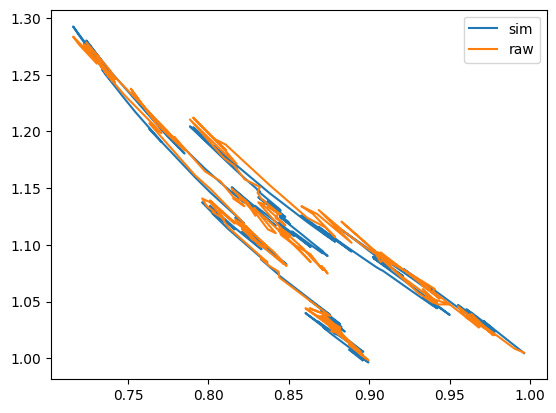

In [164]:
df = pd.DataFrame({"cw":cw, "cw2":(cw)**2, "cwdm":(cw)**3 ,  "cons":range(0,len(R))})

#df = pd.DataFrame({"cw":cw})
regr = linear_model.LinearRegression()
regr = regr.fit(df, R)
regr.score(df, R)
Rsim = ((regr.coef_) @ df.transpose()) + regr.intercept_
#plt.plot(Rsim,R)
def error2(R,Rsim):
    return sum((R-Rsim)**2)
print(error2(R,Rsim))
print(regr.coef_)

fig, ax = plt.subplots()
ax.plot(cw, Rsim,label="sim" )
#ax.errorbar(cw, Rsim,yerr=abs(np.gradient(cw)))
ax.plot(cw, R, label="raw")
#ax.plot(cw,np.gradient(cw)*1+1,label="g")
ax.legend()

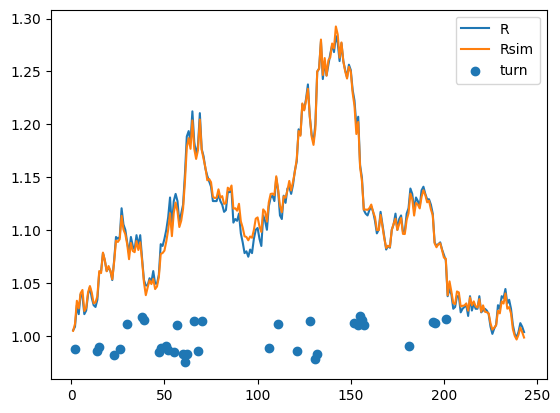

In [165]:

fig, ax = plt.subplots()
ax.plot(R, label="R")
ax.plot(Rsim,label="Rsim")
ax.scatter(x=cw[0.01<(abs((np.gradient(cw))))].index,y=1+np.gradient(cw)[0.01<(abs((np.gradient(cw))))],label="turn")
ax.legend()

In [166]:

((regr.coef_) @ df.transpose()) + regr.intercept_
regr.coef_,regr.intercept_

(array([-2.31410023e+01,  2.43352873e+01, -8.92073729e+00, -4.70578803e-04]),
 8.726373317892103)